In [5]:
import pandas as pd
import numpy as np

In [6]:
catch = pd.read_csv('catch_19951.csv')
trip = pd.read_csv('trip_19951.csv')
size = pd.read_csv('size_19951.csv')

In [7]:
catch.head()

common        strat_id      ...             wp_int      wp_catch
0    NaN  199516128302we      ...        1190.280966   1190.280966
1    NaN  199516128301wd      ...        1981.366025   1981.366025
2    NaN  199516128302wd      ...        6039.929969   6039.929969
3    NaN  199516128302wd      ...        6039.929969   6039.929969
4    NaN  199516128301wd      ...       20014.789856  20014.789856

[5 rows x 34 columns]

In [8]:
trip.head()

prim2_common        ...                   LEADER
0                NaN        ...         1234119950108010
1                NaN        ...         1038919950115001
2  SOUTHERN KINGFISH        ...         1268919950227010
3                NaN        ...         1236819950218020
4                NaN        ...         1038919950228016

[5 rows x 66 columns]

In [9]:
size.tail()

AREA_X           ID_CODE    ...     ARX_METHOD  ALT_FLAG
7769       5  1279719950108006    ...            NaN         0
7770       5  1279719950108006    ...            NaN         0
7771       5  1279719950108006    ...            NaN         0
7772       5  1279719950108006    ...            NaN         0
7773       5  1279719950108006    ...            NaN         0

[5 rows x 24 columns]

In [10]:
size.shape

(7774, 24)

In [11]:
print(f'catch shape:{catch.shape} size shape: {size.shape} trip shape: {trip.shape}')

catch shape:(8076, 34) size shape: (7774, 24) trip shape: (5771, 66)


In [12]:
size.columns

Index(['AREA_X', 'ID_CODE', 'MODE_FX', 'ST', 'SUB_REG', 'WAVE', 'YEAR',
       'month', 'kod', 'SP_CODE', 'LNGTH', 'WGT', 'lngth_imp', 'wgt_imp',
       'strat_id', 'psu_id', 'common', 'wgt_unadj', 'wp_size', 'l_in_bin',
       'l_cm_bin', 'VAR_ID', 'ARX_METHOD', 'ALT_FLAG'],
      dtype='object')

In [13]:
len(size.common.unique())

139

In [14]:
size.head().T

0         ...                             4
AREA_X                        5         ...                             1
ID_CODE        1038919950108016         ...              1038919950113004
MODE_FX                       3         ...                             3
ST                           12         ...                            12
SUB_REG                       6         ...                             6
WAVE                          1         ...                             1
YEAR                       1995         ...                          1995
month                         1         ...                             1
kod                          we         ...                            wd
SP_CODE                     NaN         ...                   8.83544e+09
LNGTH                       NaN         ...                           319
WGT                         NaN         ...                           0.3
lngth_imp                     0         ...                             1
wgt_imp                       0         ...                             1
strat_id         199516128301we         ...                199516128301wd
psu_id      1038919950108127273         ...           1038919950113127293
common                      NaN         ...                 GULF KINGFISH
wgt_unadj                   NaN         ...                           0.3
wp_size                 3853.44         ...                       20014.8
l_in_bin                    NaN         ...                            12
l_cm_bin                    NaN         ...                            31
VAR_ID           199516128301we         ...                199516128301wd
ARX_METHOD                  NaN         ...                           NaN
ALT_FLAG                      0         ...                             0

[24 rows x 5 columns]

In [15]:
len(size.SP_CODE.unique())

139

In [16]:
## code from Jeremy Howard to display all of your rows
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [17]:
display_all(size.describe(include='all').T)

count unique             top  freq         mean          std  \
AREA_X      7774    NaN             NaN   NaN      3.64446      1.53853   
ID_CODE     7774    NaN             NaN   NaN  1.19447e+15   8.8963e+13   
MODE_FX     7774    NaN             NaN   NaN       5.5081      1.76348   
ST          7774    NaN             NaN   NaN      13.6069      5.06907   
SUB_REG     7774    NaN             NaN   NaN      6.65976     0.473819   
WAVE        7774    NaN             NaN   NaN            1            0   
YEAR        7774    NaN             NaN   NaN         1995            0   
month       7774    NaN             NaN   NaN      1.55454     0.497048   
kod         7774      2              we  4574          NaN          NaN   
SP_CODE     6267    NaN             NaN   NaN  8.82851e+09  1.98698e+08   
LNGTH       6228    NaN             NaN   NaN      355.673      178.195   
WGT         6227    NaN             NaN   NaN      1.07252      1.95972   
lngth_imp   7774    NaN             NaN   NaN     0.437484     0.496108   
wgt_imp     7774    NaN             NaN   NaN     0.446874     0.497202   
strat_id    7774     57  199517128702we   704          NaN          NaN   
psu_id      7774    NaN             NaN   NaN  2.88313e+17  4.18337e+17   
common      6267    138      SHEEPSHEAD   827          NaN          NaN   
wgt_unadj   6228    NaN             NaN   NaN      1.04338      1.86814   
wp_size     7774    NaN             NaN   NaN       3654.7      5327.91   
l_in_bin    6228    NaN             NaN   NaN      13.5106      7.01242   
l_cm_bin    6228    NaN             NaN   NaN      35.2099      17.8158   
VAR_ID      7774     57  199517128702we   704          NaN          NaN   
ARX_METHOD     0    NaN             NaN   NaN          NaN          NaN   
ALT_FLAG    7774    NaN             NaN   NaN            0            0   

                    min          25%          50%          75%          max  
AREA_X                1            2            4            5            5  
ID_CODE     1.00092e+15  1.12912e+15  1.23682e+15  1.26012e+15  1.27992e+15  
MODE_FX               3            3            7            7            7  
ST                    1           12           12           12           28  
SUB_REG               6            6            7            7            7  
WAVE                  1            1            1            1            1  
YEAR               1995         1995         1995         1995         1995  
month                 1            1            2            2            2  
kod                 NaN          NaN          NaN          NaN          NaN  
SP_CODE           1e+09  8.83536e+09  8.83543e+09  8.83544e+09  8.86101e+09  
LNGTH                68          245          313          400         1920  
WGT                0.01         0.25         0.45      1.00296      46.4739  
lngth_imp             0            0            0            1            1  
wgt_imp               0            0            0            1            1  
strat_id            NaN          NaN          NaN          NaN          NaN  
psu_id      1.16022e+14  1.06292e+17  1.23472e+17  1.27452e+17  1.27952e+18  
common              NaN          NaN          NaN          NaN          NaN  
wgt_unadj             0         0.25         0.45            1      42.3733  
wp_size         4.64652      1211.06      2044.66      4079.84       130882  
l_in_bin              2            9           12           15           75  
l_cm_bin              6           24           31           40          192  
VAR_ID              NaN          NaN          NaN          NaN          NaN  
ARX_METHOD          NaN          NaN          NaN          NaN          NaN  
ALT_FLAG              0            0            0            0            0

In [18]:
trip.head().T

0         ...                             4
prim2_common                 NaN         ...                           NaN
prim1_common                 NaN         ...                 GULF KINGFISH
strat_id          199516128301we         ...                199516128302wd
psu_id        123411995010811106         ...           1038919950228127142
ADD_HRS                      NaN         ...                             0
AREA                           1         ...                             1
AREA_X                         1         ...                             1
BOAT_HRS                     NaN         ...                           NaN
CATCH                          2         ...                             2
CNTRBTRS                       1         ...                             1
CNTY                          11         ...                           127
CNTY_RES                      93         ...                           127
COASTAL                        O         ...                             Y
FFDAYS2                        0         ...                             0
FFDAYS12                       2         ...                             0
FIRST                          8         ...                             8
HRSF                           5         ...                             3
ID_CODE         1234119950108010         ...              1038919950228016
INTSITE                      106         ...                           142
MODE_F                         1         ...                             1
MODE_FX                        3         ...                             3
NUM_TYP2                       0         ...                             1
NUM_TYP3                       0         ...                             0
NUM_TYP4                       0         ...                             0
NUM_TYP6                       0         ...                             0
ON_LIST                      NaN         ...                           NaN
PARTY                         88         ...                            88
REG_RES                        5         ...                             6
ST                            12         ...                            12
ST_RES                        36         ...                            12
...                          ...         ...                           ...
kod                           we         ...                            wd
MODE_ASG                     NaN         ...                           NaN
new_list                     NaN         ...                           NaN
PRT_CODE        1234119950108010         ...              1038919950228016
CELLTYPE                     NaN         ...                             2
fshinsp_a                    NaN         ...                             0
num_fish_a                   NaN         ...                             5
fl_reg                         8         ...                             8
ADD_PH                         1         ...                             1
AREA_NC                      NaN         ...                           NaN
COUNTY                       NaN         ...                       VOLUSIA
DATE1              18APR95:08:20         ...                 18APR95:08:20
DIST                           1         ...                             1
F_BY_P                         8         ...                             8
GEAR                           1         ...                             1
MODE2001                     NaN         ...                           NaN
MUNI_RES                     NaN         ...                           NaN
MUNI_TRP                     NaN         ...                           NaN
PRIM1                          0         ...                    8835440602
PRIM2                          0         ...                             0
PVT_RES                        1         ...                             1
RIG                          NaN         ...            

In [19]:
catch.head().T

0         ...                             4
common                         NaN         ...                           NaN
strat_id            199516128302we         ...                199516128301wd
psu_id           10629199502269985         ...           1038919950113127293
AREA_X                           1         ...                             1
ID_CODE           1062919950226024         ...              1038919950113017
MODE_FX                          3         ...                             3
ST                              12         ...                            12
SUB_REG                          6         ...                             6
WAVE                             1         ...                             1
YEAR                          1995         ...                          1995
month                            2         ...                             1
kod                             we         ...                            wd
SP_CODE                        NaN         ...                           NaN
CLAIM                            0         ...                             0
RELEASE                          0         ...                             0
HARVEST                          0         ...                             0
CLAIM_UNADJ                      0         ...                             0
HARVEST_UNADJ                    0         ...                             0
RELEASE_UNADJ                    0         ...                             0
tot_len_a                        0         ...                             0
wgt_a                            0         ...                             0
tot_len_b1                       0         ...                             0
wgt_b1                           0         ...                             0
tot_cat                          0         ...                             0
wgt_ab1                          0         ...                             0
tot_len                          0         ...                             0
Landing                          0         ...                             0
VAR_ID              199516128302we         ...                199516128301wd
ARX_METHOD                     NaN         ...                           NaN
ALT_FLAG                         0         ...                             0
fl_reg                           8         ...                             8
wp_catch_precal                646         ...                           646
wp_int                     1190.28         ...                       20014.8
wp_catch                   1190.28         ...                       20014.8

[34 rows x 5 columns]

In [20]:
data = trip.merge(catch, how='inner', left_on='ID_CODE', right_on='ID_CODE')

In [21]:
data.shape

(8076, 99)

In [22]:
data_full = data.merge(size, how='inner', left_on='ID_CODE', right_on='ID_CODE')

In [23]:
data_full.shape

(20779, 122)

In [24]:
data.head()

prim2_common     prim1_common      ...           wp_int_y      wp_catch
0                NaN              NaN      ...        1190.280966   1190.280966
1                NaN              NaN      ...       12023.635772  12023.635772
2  SOUTHERN KINGFISH  FLORIDA POMPANO      ...        4525.067709   4525.067709
3                NaN   SNAPPER FAMILY      ...        1588.752731   1588.752731
4                NaN   SNAPPER FAMILY      ...        1588.752731   1588.752731

[5 rows x 99 columns]

In [25]:
data_full.head()

prim2_common     prim1_common    ...    ARX_METHOD  ALT_FLAG
0                NaN              NaN    ...           NaN         0
1                NaN              NaN    ...           NaN         0
2  SOUTHERN KINGFISH  FLORIDA POMPANO    ...           NaN         0
3                NaN   SNAPPER FAMILY    ...           NaN         0
4                NaN   SNAPPER FAMILY    ...           NaN         0

[5 rows x 122 columns]

In [26]:
print(data_full.shape)
print(size.shape[0])
print(trip.shape[0]+catch.shape[0]+size.shape[0])

(20779, 122)
7774
21621


In [27]:
display_all(data_full.describe(include='all').T)

count unique             top   freq         mean  \
prim2_common      4384     47        RED DRUM   1079          NaN   
prim1_common     14029     74     RED SNAPPER   2816          NaN   
strat_id_x       20779     57  199517128702we   2251          NaN   
psu_id_x         20779    NaN             NaN    NaN  2.78744e+17   
ADD_HRS          20779    NaN             NaN    NaN   0.00166033   
AREA             20779      9               1  12773          NaN   
AREA_X_x         20779    NaN             NaN    NaN      3.49656   
BOAT_HRS             0    NaN             NaN    NaN          NaN   
CATCH            20779    NaN             NaN    NaN      1.36648   
CNTRBTRS         20779    NaN             NaN    NaN      2.69017   
CNTY             20779    NaN             NaN    NaN      71.9336   
CNTY_RES         20779    NaN             NaN    NaN       103.49   
COASTAL          20779      3               Y  12277          NaN   
FFDAYS2          20779    NaN             NaN    NaN      7.38404   
FFDAYS12         20779    NaN             NaN    NaN      51.2176   
FIRST            20779    NaN             NaN    NaN      2.89533   
HRSF             20765    NaN             NaN    NaN      4.72454   
ID_CODE          20779    NaN             NaN    NaN  1.18775e+15   
INTSITE          20779    NaN             NaN    NaN      364.378   
MODE_F           20779    NaN             NaN    NaN       6.6443   
MODE_FX_x        20779    NaN             NaN    NaN      5.67385   
NUM_TYP2         20779    NaN             NaN    NaN      2.40902   
NUM_TYP3         20779    NaN             NaN    NaN      8.55277   
NUM_TYP4         20779    NaN             NaN    NaN    0.0526012   
NUM_TYP6         20779    NaN             NaN    NaN     0.153665   
ON_LIST              0    NaN             NaN    NaN          NaN   
PARTY            20779    NaN             NaN    NaN      20.6592   
REG_RES          20779    NaN             NaN    NaN      5.09707   
ST_x             20779    NaN             NaN    NaN      14.1995   
ST_RES           20779    NaN             NaN    NaN      22.1748   
SUB_REG_x        20779    NaN             NaN    NaN      6.75624   
TELEFON          20779    NaN             NaN    NaN      1.16786   
WAVE_x           20779    NaN             NaN    NaN            1   
YEAR_x           20779    NaN             NaN    NaN         1995   
ASG_CODE         20779    NaN             NaN    NaN  1.18775e+12   
month_x          20779    NaN             NaN    NaN      1.61394   
kod_x            20779      2              we  12558          NaN   
MODE_ASG             0    NaN             NaN    NaN          NaN   
new_list             0    NaN             NaN    NaN          NaN   
PRT_CODE         20779    NaN             NaN    NaN  1.18775e+15   
CELLTYPE         20779    NaN             NaN    NaN      1.14524   
fshinsp_a        13334    NaN             NaN    NaN      5.82038   
num_fish_a       13334    NaN             NaN    NaN      2.21944   
fl_reg_x         20779    NaN             NaN    NaN            8   
ADD_PH           20779    NaN             NaN    NaN      2.15578   
AREA_NC              0    NaN             NaN    NaN          NaN   
COUNTY           14044    107       JEFFERSON   1704          NaN   
DATE1            20779      2   18APR95:08:20  20156          NaN   
DIST             20779    NaN             NaN    NaN      4.65244   
F_BY_P           20779    NaN             NaN    NaN      3.74869   
GEAR             20779    NaN             NaN    NaN      1.04067   
MODE2001             0    NaN             NaN    NaN          NaN   
MUNI_RES             0    NaN             NaN    NaN          NaN   
MUNI_TRP             0    NaN             NaN    NaN          NaN   
PRIM1            20779    NaN             NaN    NaN  5.82679e+09   
PRIM2            20779    NaN             NaN    NaN  1.86345e+09   
PVT_RES          20779    NaN             NaN    NaN      1.15487   
RIG            

In [28]:
size.sort_values(by='ID_CODE')

AREA_X           ID_CODE    ...     ARX_METHOD  ALT_FLAG
2961       5  1000919950108007    ...            NaN         0
3849       5  1000919950108015    ...            NaN         0
3850       5  1000919950108015    ...            NaN         0
4454       5  1000919950108017    ...            NaN         0
4455       5  1000919950108018    ...            NaN         0
4456       5  1000919950108019    ...            NaN         0
4457       5  1000919950108020    ...            NaN         0
4458       5  1000919950108025    ...            NaN         0
4459       5  1000919950108027    ...            NaN         0
4460       5  1000919950108028    ...            NaN         0
4461       5  1000919950108028    ...            NaN         0
4462       5  1000919950108028    ...            NaN         0
4473       5  1000919950111001    ...            NaN         0
4474       5  1000919950111001    ...            NaN         0
4475       5  1000919950111001    ...            NaN         0
4477       5  1000919950111001    ...            NaN         0
4472       5  1000919950111001    ...            NaN         0
4478       5  1000919950111001    ...            NaN         0
4476       5  1000919950111001    ...            NaN         0
4471       5  1000919950111001    ...            NaN         0
4468       5  1000919950111001    ...            NaN         0
4469       5  1000919950111001    ...            NaN         0
4467       5  1000919950111001    ...            NaN         0
4466       5  1000919950111001    ...            NaN         0
4465       5  1000919950111001    ...            NaN         0
4464       5  1000919950111001    ...            NaN         0
4463       5  1000919950111001    ...            NaN         0
4470       5  1000919950111001    ...            NaN         0
4485       5  1000919950111002    ...            NaN         0
4484       5  1000919950111002    ...            NaN         0
...      ...               ...    ...            ...       ...
2934       1  1279919950218002    ...            NaN         0
2935       1  1279919950218002    ...            NaN         0
2933       1  1279919950218002    ...            NaN         0
2932       1  1279919950218002    ...            NaN         0
2931       1  1279919950218002    ...            NaN         0
2941       2  1279919950218005    ...            NaN         0
2940       2  1279919950218005    ...            NaN         0
2939       2  1279919950218005    ...            NaN         0
2938       2  1279919950218005    ...            NaN         0
2937       2  1279919950218005    ...            NaN         0
2936       2  1279919950218005    ...            NaN         0
2948       1  1279919950225003    ...            NaN         0
2950       1  1279919950225003    ...            NaN         0
2942       1  1279919950225003    ...            NaN         0
2943       1  1279919950225003    ...            NaN         0
2944       1  1279919950225003    ...            NaN         0
2945       1  1279919950225003    ...            NaN         0
2946       1  1279919950225003    ...            NaN         0
2947       1  1279919950225003    ...            NaN         0
2949       1  1279919950225003    ...            NaN         0
2951       2  1279919950225009    ...            NaN         0
2959       1  1279919950225010    ...            NaN         0
2952       1  1279919950225010    ...            NaN         0
2953       1  1279919950225010    ...            NaN         0
2954       1  1279919950225010    ...            NaN         0
2955       1  1279919950225010    ...            NaN         0
2956       1  1279919950225010    ...            NaN         0
2957       1  1279919950225010    ...            NaN         0
2958       1  1279919950225010    ...            NaN         0
2960       2  1279919950225011    ...            NaN         0

[7774 rows x 24 columns]

In [29]:
catch.sort_values(by='ID_CODE')

common        strat_id     ...            wp_int     wp_catch
4118                  NaN  199517128301we     ...       2556.499724  2556.499724
4119                  NaN  199517128301we     ...       2556.499724  2556.499724
4117                  NaN  199517128301we     ...       2556.499724  2556.499724
4116                  NaN  199517128301we     ...       2556.499724  2556.499724
4114                  NaN  199517128301we     ...       2556.499724  2556.499724
4113                  NaN  199517128301we     ...       2556.499724  2556.499724
4837    SOUTHERN KINGFISH  199517128301we     ...       2556.499724  2556.499724
4112                  NaN  199517128301we     ...       2556.499724  2556.499724
4115                  NaN  199517128301we     ...       2556.499724  2556.499724
4110                  NaN  199517128301we     ...       2556.499724  2556.499724
4108                  NaN  199517128301we     ...       2556.499724  2556.499724
4109                  NaN  199517128301we     ...       2556.499724  2556.499724
4107                  NaN  199517128301we     ...       2556.499724  2556.499724
4106                  NaN  199517128301we     ...       2556.499724  2556.499724
5288             RED DRUM  199517128501we     ...        805.957191   805.957191
5285                  NaN  199517128501we     ...        805.957191   805.957191
6909       SEATROUT GENUS  199517128701we     ...       2636.883891  2636.883891
6585  GAFFTOPSAIL CATFISH  199517128701we     ...       2636.883891  2636.883891
6584  GAFFTOPSAIL CATFISH  199517128701we     ...       2636.883891  2636.883891
6567        CREVALLE JACK  199517128701we     ...       2636.883891  2636.883891
6583  GAFFTOPSAIL CATFISH  199517128701we     ...       2636.883891  2636.883891
4103                  NaN  199517128301we     ...       2556.499724  2556.499724
4101                  NaN  199517128301we     ...       2556.499724  2556.499724
4100                  NaN  199517128301we     ...       2556.499724  2556.499724
4098                  NaN  199517128301we     ...       2556.499724  2556.499724
6693     HARDHEAD CATFISH  199517128701we     ...       2636.883891  2636.883891
6467                  NaN  199517128701we     ...       2636.883891  2636.883891
6740             LADYFISH  199517128701we     ...       2636.883891  2636.883891
7152     SPOTTED SEATROUT  199517128701we     ...       2636.883891  2636.883891
6538         COMMON SNOOK  199517128701we     ...       2636.883891  2636.883891
...                   ...             ...     ...               ...          ...
3530           SHEEPSHEAD   19951718701we     ...       1503.068332  1503.068332
3521                  NaN   19951718701we     ...       1503.068332  1503.068332
3529           SHEEPSHEAD   19951718701we     ...       1503.068332  1503.068332
3528             RED DRUM   19951718701we     ...       1503.068332  1503.068332
3381                  NaN   19951718301we     ...       2050.044084  2050.044084
3482           SHEEPSHEAD   19951718701we     ...       1153.128015  1153.128015
3473             RED DRUM   19951718701we     ...       1153.128015  1153.128015
3397       SEATROUT GENUS   19951718301we     ...       7387.576760  7387.576760
3392     ATLANTIC CROAKER   19951718301we     ...       7387.576760  7387.576760
3394              PINFISH   19951718302we     ...       2050.044084  2050.044084
3391     ATLANTIC CROAKER   19951718302we     ...       2050.044084  2050.044084
3481           SHEEPSHEAD   19951718702we     ...        905.174605   905.174605
3380                  NaN   19951718302we     ...       2050.044084  2050.044084
3379                  NaN   19951718302we     ...       2050.044084  2050.044084
3503          RED SNAPPER   19951718702we     ...       1560.130692  1560.130692
3512           SHEEPSHEAD   19951718702we     ...       1560.130692  1560.130692
3515              TOMTATE   19951718702we     ...       1560.130692  1560.130692
3520                  NaN   19951718702we     ... 

In [30]:
test = size.merge(catch, how='inner', left_on='ID_CODE', right_on='ID_CODE')
test.shape

(20779, 57)

In [31]:
test2 = size.merge(trip, how='inner', left_on='ID_CODE', right_on='ID_CODE')
test2.shape

(7774, 89)

In [32]:
test3 = test2.merge(catch, how='inner', left_on='ID_CODE', right_on='ID_CODE')

In [33]:
test3.shape

(20779, 122)

In [34]:
test4 = pd.merge(trip, catch, on='ID_CODE')
test4.shape

(8076, 99)

# ok so it's not looking pretty here. Let's just go with trip and size

In [35]:
data = pd.merge(trip, size, on='ID_CODE')
data.shape

(7774, 89)

In [36]:
data.head()

prim2_common     prim1_common     ...     ARX_METHOD_y  ALT_FLAG_y
0                NaN              NaN     ...              NaN           0
1                NaN              NaN     ...              NaN           0
2  SOUTHERN KINGFISH  FLORIDA POMPANO     ...              NaN           0
3                NaN   SNAPPER FAMILY     ...              NaN           0
4                NaN   SNAPPER FAMILY     ...              NaN           0

[5 rows x 89 columns]

In [37]:
display_all(data_full.describe(include='all').T)

count unique             top   freq         mean  \
prim2_common      4384     47        RED DRUM   1079          NaN   
prim1_common     14029     74     RED SNAPPER   2816          NaN   
strat_id_x       20779     57  199517128702we   2251          NaN   
psu_id_x         20779    NaN             NaN    NaN  2.78744e+17   
ADD_HRS          20779    NaN             NaN    NaN   0.00166033   
AREA             20779      9               1  12773          NaN   
AREA_X_x         20779    NaN             NaN    NaN      3.49656   
BOAT_HRS             0    NaN             NaN    NaN          NaN   
CATCH            20779    NaN             NaN    NaN      1.36648   
CNTRBTRS         20779    NaN             NaN    NaN      2.69017   
CNTY             20779    NaN             NaN    NaN      71.9336   
CNTY_RES         20779    NaN             NaN    NaN       103.49   
COASTAL          20779      3               Y  12277          NaN   
FFDAYS2          20779    NaN             NaN    NaN      7.38404   
FFDAYS12         20779    NaN             NaN    NaN      51.2176   
FIRST            20779    NaN             NaN    NaN      2.89533   
HRSF             20765    NaN             NaN    NaN      4.72454   
ID_CODE          20779    NaN             NaN    NaN  1.18775e+15   
INTSITE          20779    NaN             NaN    NaN      364.378   
MODE_F           20779    NaN             NaN    NaN       6.6443   
MODE_FX_x        20779    NaN             NaN    NaN      5.67385   
NUM_TYP2         20779    NaN             NaN    NaN      2.40902   
NUM_TYP3         20779    NaN             NaN    NaN      8.55277   
NUM_TYP4         20779    NaN             NaN    NaN    0.0526012   
NUM_TYP6         20779    NaN             NaN    NaN     0.153665   
ON_LIST              0    NaN             NaN    NaN          NaN   
PARTY            20779    NaN             NaN    NaN      20.6592   
REG_RES          20779    NaN             NaN    NaN      5.09707   
ST_x             20779    NaN             NaN    NaN      14.1995   
ST_RES           20779    NaN             NaN    NaN      22.1748   
SUB_REG_x        20779    NaN             NaN    NaN      6.75624   
TELEFON          20779    NaN             NaN    NaN      1.16786   
WAVE_x           20779    NaN             NaN    NaN            1   
YEAR_x           20779    NaN             NaN    NaN         1995   
ASG_CODE         20779    NaN             NaN    NaN  1.18775e+12   
month_x          20779    NaN             NaN    NaN      1.61394   
kod_x            20779      2              we  12558          NaN   
MODE_ASG             0    NaN             NaN    NaN          NaN   
new_list             0    NaN             NaN    NaN          NaN   
PRT_CODE         20779    NaN             NaN    NaN  1.18775e+15   
CELLTYPE         20779    NaN             NaN    NaN      1.14524   
fshinsp_a        13334    NaN             NaN    NaN      5.82038   
num_fish_a       13334    NaN             NaN    NaN      2.21944   
fl_reg_x         20779    NaN             NaN    NaN            8   
ADD_PH           20779    NaN             NaN    NaN      2.15578   
AREA_NC              0    NaN             NaN    NaN          NaN   
COUNTY           14044    107       JEFFERSON   1704          NaN   
DATE1            20779      2   18APR95:08:20  20156          NaN   
DIST             20779    NaN             NaN    NaN      4.65244   
F_BY_P           20779    NaN             NaN    NaN      3.74869   
GEAR             20779    NaN             NaN    NaN      1.04067   
MODE2001             0    NaN             NaN    NaN          NaN   
MUNI_RES             0    NaN             NaN    NaN          NaN   
MUNI_TRP             0    NaN             NaN    NaN          NaN   
PRIM1            20779    NaN             NaN    NaN  5.82679e+09   
PRIM2            20779    NaN             NaN    NaN  1.86345e+09   
PVT_RES          20779    NaN             NaN    NaN      1.15487   
RIG            

In [38]:
trip.columns

Index(['prim2_common', 'prim1_common', 'strat_id', 'psu_id', 'ADD_HRS', 'AREA',
       'AREA_X', 'BOAT_HRS', 'CATCH', 'CNTRBTRS', 'CNTY', 'CNTY_RES',
       'COASTAL', 'FFDAYS2', 'FFDAYS12', 'FIRST', 'HRSF', 'ID_CODE', 'INTSITE',
       'MODE_F', 'MODE_FX', 'NUM_TYP2', 'NUM_TYP3', 'NUM_TYP4', 'NUM_TYP6',
       'ON_LIST', 'PARTY', 'REG_RES', 'ST', 'ST_RES', 'SUB_REG', 'TELEFON',
       'WAVE', 'YEAR', 'ASG_CODE', 'month', 'kod', 'MODE_ASG', 'new_list',
       'PRT_CODE', 'CELLTYPE', 'fshinsp_a', 'num_fish_a', 'fl_reg', 'ADD_PH',
       'AREA_NC', 'COUNTY', 'DATE1', 'DIST', 'F_BY_P', 'GEAR', 'MODE2001',
       'MUNI_RES', 'MUNI_TRP', 'PRIM1', 'PRIM2', 'PVT_RES', 'RIG', 'SEP_FISH',
       'TIME', 'ZIP', 'wp_int', 'VAR_ID', 'ARX_METHOD', 'ALT_FLAG', 'LEADER'],
      dtype='object')

In [39]:
from fastai.imports import *

# from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.ensemble import forest
from sklearn.tree import export_graphviz


def set_plot_sizes(sml, med, big):
    plt.rc('font', size=sml)          # controls default text sizes
    plt.rc('axes', titlesize=sml)     # fontsize of the axes title
    plt.rc('axes', labelsize=med)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=sml)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=sml)    # fontsize of the tick labels
    plt.rc('legend', fontsize=sml)    # legend fontsize
    plt.rc('figure', titlesize=big)  # fontsize of the figure title

def parallel_trees(m, fn, n_jobs=8):
        return list(ProcessPoolExecutor(n_jobs).map(fn, m.estimators_))

def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    """ Draws a representation of a random forest in IPython.
    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}', s)))

def combine_date(years, months=1, days=1, weeks=None, hours=None, minutes=None,
              seconds=None, milliseconds=None, microseconds=None, nanoseconds=None):
    years = np.asarray(years) - 1970
    months = np.asarray(months) - 1
    days = np.asarray(days) - 1
    types = ('<M8[Y]', '<m8[M]', '<m8[D]', '<m8[W]', '<m8[h]',
             '<m8[m]', '<m8[s]', '<m8[ms]', '<m8[us]', '<m8[ns]')
    vals = (years, months, days, weeks, hours, minutes, seconds,
            milliseconds, microseconds, nanoseconds)
    return sum(np.asarray(v, dtype=t) for t, v in zip(types, vals)
               if v is not None)

def get_sample(df,n):
    """ Gets a random sample of n rows from df, without replacement.
    Parameters:
    -----------
    df: A pandas data frame, that you wish to sample from.
    n: The number of rows you wish to sample.
    Returns:
    --------
    return value: A random sample of n rows of df.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    >>> get_sample(df, 2)
       col1 col2
    1     2    b
    2     3    a
    """
    idxs = sorted(np.random.permutation(len(df))[:n])
    return df.iloc[idxs].copy()

def add_datepart(df, fldname, drop=True, time=False, errors="raise"):	
    """add_datepart converts a column of df from a datetime64 to many columns containing
    the information from the date. This applies changes inplace.
    Parameters:
    -----------
    df: A pandas data frame. df gain several new columns.
    fldname: A string that is the name of the date column you wish to expand.
        If it is not a datetime64 series, it will be converted to one with pd.to_datetime.
    drop: If true then the original date column will be removed.
    time: If true time features: Hour, Minute, Second will be added.
    Examples:
    ---------
    >>> df = pd.DataFrame({ 'A' : pd.to_datetime(['3/11/2000', '3/12/2000', '3/13/2000'], infer_datetime_format=False) })
    >>> df
        A
    0   2000-03-11
    1   2000-03-12
    2   2000-03-13
    >>> add_datepart(df, 'A')
    >>> df
        AYear AMonth AWeek ADay ADayofweek ADayofyear AIs_month_end AIs_month_start AIs_quarter_end AIs_quarter_start AIs_year_end AIs_year_start AElapsed
    0   2000  3      10    11   5          71         False         False           False           False             False        False          952732800
    1   2000  3      10    12   6          72         False         False           False           False             False        False          952819200
    2   2000  3      11    13   0          73         False         False           False           False             False        False          952905600
    """
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True, errors=errors)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop: df.drop(fldname, axis=1, inplace=True)

def is_date(x): return np.issubdtype(x.dtype, np.datetime64)

def train_cats(df):
    """Change any columns of strings in a panda's dataframe to a column of
    categorical values. This applies the changes inplace.
    Parameters:
    -----------
    df: A pandas dataframe. Any columns of strings will be changed to
        categorical values.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    note the type of col2 is string
    >>> train_cats(df)
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    now the type of col2 is category
    """
    for n,c in df.items():
        if is_string_dtype(c): df[n] = c.astype('category').cat.as_ordered()

def apply_cats(df, trn):
    """Changes any columns of strings in df into categorical variables using trn as
    a template for the category codes.
    Parameters:
    -----------
    df: A pandas dataframe. Any columns of strings will be changed to
        categorical values. The category codes are determined by trn.
    trn: A pandas dataframe. When creating a category for df, it looks up the
        what the category's code were in trn and makes those the category codes
        for df.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    note the type of col2 is string
    >>> train_cats(df)
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    now the type of col2 is category {a : 1, b : 2}
    >>> df2 = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['b', 'a', 'a']})
    >>> apply_cats(df2, df)
           col1 col2
        0     1    b
        1     2    a
        2     3    a
    now the type of col is category {a : 1, b : 2}
    """
    for n,c in df.items():
        if (n in trn.columns) and (trn[n].dtype.name=='category'):
            df[n] = pd.Categorical(c, categories=trn[n].cat.categories, ordered=True)

def fix_missing(df, col, name, na_dict):
    """ Fill missing data in a column of df with the median, and add a {name}_na column
    which specifies if the data was missing.
    Parameters:
    -----------
    df: The data frame that will be changed.
    col: The column of data to fix by filling in missing data.
    name: The name of the new filled column in df.
    na_dict: A dictionary of values to create na's of and the value to insert. If
        name is not a key of na_dict the median will fill any missing data. Also
        if name is not a key of na_dict and there is no missing data in col, then
        no {name}_na column is not created.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, np.NaN, 3], 'col2' : [5, 2, 2]})
    >>> df
       col1 col2
    0     1    5
    1   nan    2
    2     3    2
    >>> fix_missing(df, df['col1'], 'col1', {})
    >>> df
       col1 col2 col1_na
    0     1    5   False
    1     2    2    True
    2     3    2   False
    >>> df = pd.DataFrame({'col1' : [1, np.NaN, 3], 'col2' : [5, 2, 2]})
    >>> df
       col1 col2
    0     1    5
    1   nan    2
    2     3    2
    >>> fix_missing(df, df['col2'], 'col2', {})
    >>> df
       col1 col2
    0     1    5
    1   nan    2
    2     3    2
    >>> df = pd.DataFrame({'col1' : [1, np.NaN, 3], 'col2' : [5, 2, 2]})
    >>> df
       col1 col2
    0     1    5
    1   nan    2
    2     3    2
    >>> fix_missing(df, df['col1'], 'col1', {'col1' : 500})
    >>> df
       col1 col2 col1_na
    0     1    5   False
    1   500    2    True
    2     3    2   False
    """
    if is_numeric_dtype(col):
        if pd.isnull(col).sum() or (name in na_dict):
            df[name+'_na'] = pd.isnull(col)
            filler = na_dict[name] if name in na_dict else col.median()
            df[name] = col.fillna(filler)
            na_dict[name] = filler
    return na_dict

def numericalize(df, col, name, max_n_cat):
    """ Changes the column col from a categorical type to it's integer codes.
    Parameters:
    -----------
    df: A pandas dataframe. df[name] will be filled with the integer codes from
        col.
    col: The column you wish to change into the categories.
    name: The column name you wish to insert into df. This column will hold the
        integer codes.
    max_n_cat: If col has more categories than max_n_cat it will not change the
        it to its integer codes. If max_n_cat is None, then col will always be
        converted.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    note the type of col2 is string
    >>> train_cats(df)
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    now the type of col2 is category { a : 1, b : 2}
    >>> numericalize(df, df['col2'], 'col3', None)
       col1 col2 col3
    0     1    a    1
    1     2    b    2
    2     3    a    1
    """
    if not is_numeric_dtype(col) and ( max_n_cat is None or len(col.cat.categories)>max_n_cat):
        df[name] = col.cat.codes+1

def scale_vars(df, mapper):
    warnings.filterwarnings('ignore', category=sklearn.exceptions.DataConversionWarning)
    if mapper is None:
        map_f = [([n],StandardScaler()) for n in df.columns if is_numeric_dtype(df[n])]
        mapper = DataFrameMapper(map_f).fit(df)
    df[mapper.transformed_names_] = mapper.transform(df)
    return mapper

def proc_df(df, y_fld=None, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None,
            preproc_fn=None, max_n_cat=None, subset=None, mapper=None):
    """ proc_df takes a data frame df and splits off the response variable, and
    changes the df into an entirely numeric dataframe. For each column of df 
    which is not in skip_flds nor in ignore_flds, na values are replaced by the
    median value of the column.
    Parameters:
    -----------
    df: The data frame you wish to process.
    y_fld: The name of the response variable
    skip_flds: A list of fields that dropped from df.
    ignore_flds: A list of fields that are ignored during processing.
    do_scale: Standardizes each column in df. Takes Boolean Values(True,False)
    na_dict: a dictionary of na columns to add. Na columns are also added if there
        are any missing values.
    preproc_fn: A function that gets applied to df.
    max_n_cat: The maximum number of categories to break into dummy values, instead
        of integer codes.
    subset: Takes a random subset of size subset from df.
    mapper: If do_scale is set as True, the mapper variable
        calculates the values used for scaling of variables during training time (mean and standard deviation).
    Returns:
    --------
    [x, y, nas, mapper(optional)]:
        x: x is the transformed version of df. x will not have the response variable
            and is entirely numeric.
        y: y is the response variable
        nas: returns a dictionary of which nas it created, and the associated median.
        mapper: A DataFrameMapper which stores the mean and standard deviation of the corresponding continuous
        variables which is then used for scaling of during test-time.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    note the type of col2 is string
    >>> train_cats(df)
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    now the type of col2 is category { a : 1, b : 2}
    >>> x, y, nas = proc_df(df, 'col1')
    >>> x
       col2
    0     1
    1     2
    2     1
    >>> data = DataFrame(pet=["cat", "dog", "dog", "fish", "cat", "dog", "cat", "fish"],
                 children=[4., 6, 3, 3, 2, 3, 5, 4],
                 salary=[90, 24, 44, 27, 32, 59, 36, 27])
    >>> mapper = DataFrameMapper([(:pet, LabelBinarizer()),
                          ([:children], StandardScaler())])
    >>>round(fit_transform!(mapper, copy(data)), 2)
    8x4 Array{Float64,2}:
    1.0  0.0  0.0   0.21
    0.0  1.0  0.0   1.88
    0.0  1.0  0.0  -0.63
    0.0  0.0  1.0  -0.63
    1.0  0.0  0.0  -1.46
    0.0  1.0  0.0  -0.63
    1.0  0.0  0.0   1.04
    0.0  0.0  1.0   0.21
    """
    if not ignore_flds: ignore_flds=[]
    if not skip_flds: skip_flds=[]
    if subset: df = get_sample(df,subset)
    else: df = df.copy()
    ignored_flds = df.loc[:, ignore_flds]
    df.drop(ignore_flds, axis=1, inplace=True)
    if preproc_fn: preproc_fn(df)
    if y_fld is None: y = None
    else:
        if not is_numeric_dtype(df[y_fld]): df[y_fld] = df[y_fld].cat.codes
        y = df[y_fld].values
        skip_flds += [y_fld]
    df.drop(skip_flds, axis=1, inplace=True)

    if na_dict is None: na_dict = {}
    else: na_dict = na_dict.copy()
    na_dict_initial = na_dict.copy()
    for n,c in df.items(): na_dict = fix_missing(df, c, n, na_dict)
    if len(na_dict_initial.keys()) > 0:
        df.drop([a + '_na' for a in list(set(na_dict.keys()) - set(na_dict_initial.keys()))], axis=1, inplace=True)
    if do_scale: mapper = scale_vars(df, mapper)
    for n,c in df.items(): numericalize(df, c, n, max_n_cat)
    df = pd.get_dummies(df, dummy_na=True)
    df = pd.concat([ignored_flds, df], axis=1)
    res = [df, y, na_dict]
    if do_scale: res = res + [mapper]
    return res

def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

def set_rf_samples(n):
    """ Changes Scikit learn's random forests to give each tree a random sample of
    n random rows.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n))

def reset_rf_samples():
    """ Undoes the changes produced by set_rf_samples.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n_samples))

def get_nn_mappers(df, cat_vars, contin_vars):
    # Replace nulls with 0 for continuous, "" for categorical.
    for v in contin_vars: df[v] = df[v].fillna(df[v].max()+100,)
    for v in cat_vars: df[v].fillna('#NA#', inplace=True)

    # list of tuples, containing variable and instance of a transformer for that variable
    # for categoricals, use LabelEncoder to map to integers. For continuous, standardize
    cat_maps = [(o, LabelEncoder()) for o in cat_vars]
    contin_maps = [([o], StandardScaler()) for o in contin_vars]
    return DataFrameMapper(cat_maps).fit(df), DataFrameMapper(contin_maps).fit(df)

In [40]:
train_cats(data)

In [41]:
data.head()

prim2_common     prim1_common     ...     ARX_METHOD_y  ALT_FLAG_y
0                NaN              NaN     ...              NaN           0
1                NaN              NaN     ...              NaN           0
2  SOUTHERN KINGFISH  FLORIDA POMPANO     ...              NaN           0
3                NaN   SNAPPER FAMILY     ...              NaN           0
4                NaN   SNAPPER FAMILY     ...              NaN           0

[5 rows x 89 columns]

In [42]:
data.common.cat.categories


Index(['ALMACO JACK', 'ATLANTIC CROAKER', 'ATLANTIC MENHADEN',
       'ATLANTIC SHARPNOSE SHARK', 'ATLANTIC SPADEFISH',
       'ATLANTIC THREAD HERRING', 'BALLYHOO', 'BANDED RUDDERFISH', 'BAR JACK',
       'BARRACUDA GENUS',
       ...
       'VERMILION SNAPPER', 'WAHOO', 'WARMOUTH', 'WEAKFISH', 'WHITE GRUNT',
       'WHITE MULLET', 'WHITEBONE PORGY', 'YELLOW CHUB', 'YELLOW JACK',
       'YELLOWTAIL SNAPPER'],
      dtype='object', length=138)

In [43]:
display_all(data.isnull().sum().sort_index()/len(data))


ADD_HRS         0.000000
ADD_PH          0.000000
ALT_FLAG_x      0.000000
ALT_FLAG_y      0.000000
AREA            0.000000
AREA_NC         1.000000
AREA_X_x        0.000000
AREA_X_y        0.000000
ARX_METHOD_x    1.000000
ARX_METHOD_y    1.000000
ASG_CODE        0.000000
BOAT_HRS        1.000000
CATCH           0.000000
CELLTYPE        0.000000
CNTRBTRS        0.000000
CNTY            0.000000
CNTY_RES        0.000000
COASTAL         0.000000
COUNTY          0.237330
DATE1           0.000000
DIST            0.000000
FFDAYS12        0.000000
FFDAYS2         0.000000
FIRST           0.000000
F_BY_P          0.000000
GEAR            0.000000
HRSF            0.000772
ID_CODE         0.000000
INTSITE         0.000000
LEADER          0.000000
LNGTH           0.198868
MODE2001        1.000000
MODE_ASG        1.000000
MODE_F          0.000000
MODE_FX_x       0.000000
MODE_FX_y       0.000000
MUNI_RES        1.000000
MUNI_TRP        1.000000
NUM_TYP2        0.000000
NUM_TYP3        0.000000


In [44]:
data.drop(columns=['new_list','RIG','ON_LIST','MUNI_TRP','MUNI_RES','MODE_ASG','MODE2001','BOAT_HRS','ARX_METHOD_y','ARX_METHOD_x','AREA_NC'], inplace=True)

In [45]:
#data.to_feather('95_fish_data')

In [46]:
df, y, nas = proc_df(data, 'common')


In [47]:
display_all(df.isnull().sum().sort_index()/len(df))


ADD_HRS          0.0
ADD_PH           0.0
ALT_FLAG_x       0.0
ALT_FLAG_y       0.0
AREA             0.0
AREA_X_x         0.0
AREA_X_y         0.0
ASG_CODE         0.0
CATCH            0.0
CELLTYPE         0.0
CNTRBTRS         0.0
CNTY             0.0
CNTY_RES         0.0
COASTAL          0.0
COUNTY           0.0
DATE1            0.0
DIST             0.0
FFDAYS12         0.0
FFDAYS2          0.0
FIRST            0.0
F_BY_P           0.0
GEAR             0.0
HRSF             0.0
HRSF_na          0.0
ID_CODE          0.0
INTSITE          0.0
LEADER           0.0
LNGTH            0.0
LNGTH_na         0.0
MODE_F           0.0
MODE_FX_x        0.0
MODE_FX_y        0.0
NUM_TYP2         0.0
NUM_TYP3         0.0
NUM_TYP4         0.0
NUM_TYP6         0.0
PARTY            0.0
PRIM1            0.0
PRIM2            0.0
PRT_CODE         0.0
PVT_RES          0.0
REG_RES          0.0
SEP_FISH         0.0
SP_CODE          0.0
SP_CODE_na       0.0
ST_RES           0.0
ST_x             0.0
ST_y         

In [48]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


In [49]:
len(y)
len(df)

7774

In [50]:
m = RandomForestClassifier(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

/home/lubuntu/anaconda3/envs/project/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9987136609210188

In [51]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 1200
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(data, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((6574, 86), (6574,), (1200, 86))

In [52]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [53]:
m = RandomForestClassifier(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/home/lubuntu/anaconda3/envs/project/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 326 ms, sys: 28.7 ms, total: 355 ms
Wall time: 283 ms
[2.7232114758714983, 30.60020424768436, 0.997414055369638, 0.6641666666666667]


In [56]:
# trip variables to use: prim1_common (primary fish sought), County, Area_X or DIST (distance from shoe), date,ffdays12
# CNTRBTRS (num of contributing fisherman)

# from fastai import rf_feature_importance
# feature_importance = rf_feature_importance(m, df)

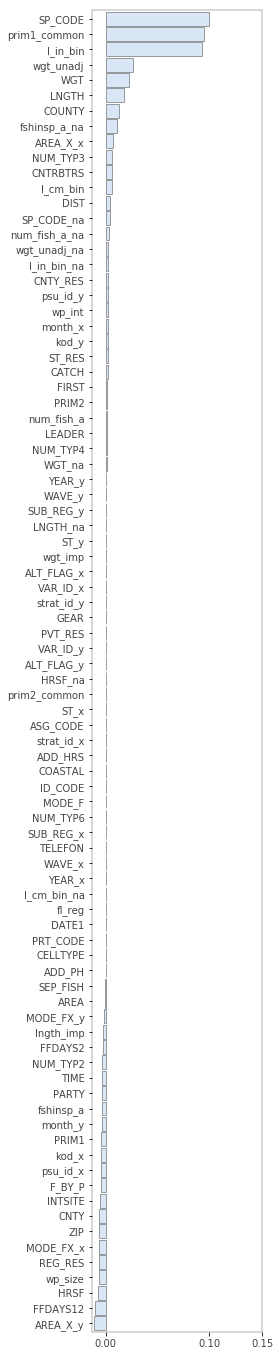

In [55]:
from rfpimp import *

imp = importances(m, X_valid, y_valid, n_samples=-1)
viz = plot_importances(imp)
viz.view()

In [59]:
# trip variables to use: prim1_common (primary fish sought), County, Area_X or DIST (distance from shoe), date,ffdays12
# CNTRBTRS (num of contributing fisherman)


#small_size = trip['prim1_common', 'COUNTY', 'DIST', 'month','FFDAYS12']

size.columns

Index(['AREA_X', 'ID_CODE', 'MODE_FX', 'ST', 'SUB_REG', 'WAVE', 'YEAR',
       'month', 'kod', 'SP_CODE', 'LNGTH', 'WGT', 'lngth_imp', 'wgt_imp',
       'strat_id', 'psu_id', 'common', 'wgt_unadj', 'wp_size', 'l_in_bin',
       'l_cm_bin', 'VAR_ID', 'ARX_METHOD', 'ALT_FLAG'],
      dtype='object')

In [60]:
trip.columns

Index(['prim2_common', 'prim1_common', 'strat_id', 'psu_id', 'ADD_HRS', 'AREA',
       'AREA_X', 'BOAT_HRS', 'CATCH', 'CNTRBTRS', 'CNTY', 'CNTY_RES',
       'COASTAL', 'FFDAYS2', 'FFDAYS12', 'FIRST', 'HRSF', 'ID_CODE', 'INTSITE',
       'MODE_F', 'MODE_FX', 'NUM_TYP2', 'NUM_TYP3', 'NUM_TYP4', 'NUM_TYP6',
       'ON_LIST', 'PARTY', 'REG_RES', 'ST', 'ST_RES', 'SUB_REG', 'TELEFON',
       'WAVE', 'YEAR', 'ASG_CODE', 'month', 'kod', 'MODE_ASG', 'new_list',
       'PRT_CODE', 'CELLTYPE', 'fshinsp_a', 'num_fish_a', 'fl_reg', 'ADD_PH',
       'AREA_NC', 'COUNTY', 'DATE1', 'DIST', 'F_BY_P', 'GEAR', 'MODE2001',
       'MUNI_RES', 'MUNI_TRP', 'PRIM1', 'PRIM2', 'PVT_RES', 'RIG', 'SEP_FISH',
       'TIME', 'ZIP', 'wp_int', 'VAR_ID', 'ARX_METHOD', 'ALT_FLAG', 'LEADER'],
      dtype='object')

In [71]:
size_cols = ['ID_CODE', 'kod', 'common']
trip_cols = ['ID_CODE', 'kod', 'prim1_common', 'CNTRBTRS', 'COUNTY', 'AREA_X']

In [137]:
small_size = size[size_cols].copy()
small_trip = trip[trip_cols].copy()

In [138]:
small_data = pd.merge(small_size, small_trip, how='inner', on='ID_CODE')

In [139]:
small_data.shape

(7774, 8)

In [201]:
mask = small_data['common'].isnull()
data = small_data[mask].copy()
#small_data.common.value_counts(dropna=False)
data.drop(columns='ID_CODE',inplace=True)
data.drop(columns='kod_x', inplace=True)

KeyError: '[-1  0  0  0 ...  0  0  0  0] not in index'

In [197]:
train_cats(data)

0        True
1       False
2       False
3       False
4       False
5       False
6        True
7        True
8        True
9       False
10      False
11      False
12       True
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22       True
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
7744    False
7745    False
7746    False
7747    False
7748    False
7749    False
7750     True
7751     True
7752    False
7753    False
7754    False
7755    False
7756    False
7757    False
7758    False
7759    False
7760    False
7761     True
7762    False
7763    False
7764    False
7765    False
7766    False
7767    False
7768    False
7769    False
7770    False
7771    False
7772    False
7773    False
Name: common, Length: 7774, dtype: bool

In [190]:
df, y, nas = proc_df(data, 'common')

In [183]:
n_valid = 700
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((807, 6), (807,), (700, 6))

In [184]:
m2 = RandomForestClassifier(n_jobs=-1)
%time m2.fit(X_train, y_train)
print_score(m2)

/home/lubuntu/anaconda3/envs/project/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 22.2 ms, sys: 949 µs, total: 23.2 ms
Wall time: 117 ms
[0.0, 0.0, 1.0, 1.0]


In [185]:
small_data.common.value_counts(dropna=False)

NaN                    1507
SHEEPSHEAD              827
SPOTTED SEATROUT        728
WHITE GRUNT             402
PINFISH                 311
RED DRUM                304
BLUEFISH                258
SOUTHERN KINGFISH       220
KING MACKEREL           202
GRAY SNAPPER            184
RED SNAPPER             143
YELLOWTAIL SNAPPER      143
BLACK SEA BASS          126
SAND SEATROUT           109
SAND PERCH               90
BLUE RUNNER              89
DOLPHIN                  79
GAG                      79
BLACK DRUM               78
GRAY TRIGGERFISH         74
BLUESTRIPED GRUNT        73
LANE SNAPPER             70
SOUTHERN FLOUNDER        63
SPOT                     61
CERO                     58
CREVALLE JACK            58
SPOTTAIL PINFISH         56
GULF KINGFISH            54
SPANISH MACKEREL         54
LARGEMOUTH BASS          49
                       ... 
BULL SHARK                2
ROCK HIND                 2
ROUND SCAD                2
BIGEYE SCAD               1
FANTAIL MULLET      

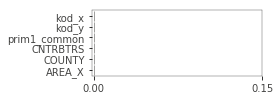

In [186]:
imp = importances(m2, X_valid, y_valid, n_samples=-1)
viz = plot_importances(imp)
viz.view()

In [ ]:
# X= [1234519950215123, 1, 1, ]
# m2.predict(X)

In [203]:
import pickle 

with open('model.pkl','wb') as pickle_file:
    pickle.dump(m2, pickle_file)



In [204]:
with open('model.pkl', 'rb') as pickle_file:
    unpickled = pickle.load(pickle_file)

In [207]:
unpickled.predict(df)

array([-1, -1, -1, -1, ..., -1, -1, -1, -1], dtype=int8)

In [177]:
data.columns

Index(['ID_CODE', 'kod_x', 'common', 'kod_y', 'prim1_common', 'CNTRBTRS',
       'COUNTY', 'AREA_X'],
      dtype='object')

In [178]:
data.head()

ID_CODE kod_x common   ...   CNTRBTRS     COUNTY  AREA_X
0   1038919950108016    we    NaN   ...          1    VOLUSIA       5
6   1038919950113006    wd    NaN   ...          1    BREVARD       1
7   1038919950113007    wd    NaN   ...          1  NANTUCKET       1
8   1038919950113008    wd    NaN   ...          1    BREVARD       1
12  1038919950113013    wd    NaN   ...          1    BREVARD       1

[5 rows x 8 columns]

In [216]:
# {'key':x, 'value':x } for x in [1:4]
#dumb = x for x in [1:4]
[{'key':x, 'value':x} for x in data.common.unique()]

[{'key': nan, 'value': nan}]